# Macrostrat Visualizer

This notebook provides widgets for interacting with and plotting Macrostrat data.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import pickle
import ipywidgets as widgets
from helper import *

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# choose North American Lambert projection
epsg = 2252
proj4 = 'epsg:%d' % epsg

In [3]:
# time axis for analysis
nt = 60
t_edges = np.linspace(600, 0, nt+1)
dt = np.mean(np.diff(t_edges))
t = t_edges[0:-1]+dt/2

In [4]:
# Macrostrat columns of North America
columns = load_shapefile('data/columns_2023-06.gpkg', 'col_id', project_id=1)
columns = columns.to_crs(proj4)

# list of unique environments
env = pd.read_csv('data/environments_2023-06.csv')

# outline of Laurentia
laurentia = gpd.read_file('gis/Laurentia/Laurentia.shp')
laurentia = laurentia.to_crs(proj4)

# Macrostrat columns within Laurentian outline defined above
laurentia_columns = gpd.sjoin(columns, laurentia, predicate='intersects')

# political boundaries
boundaries = gpd.read_file('gis/political_boundaries/boundary_p_v2.shp')
boundaries = boundaries.to_crs(proj4)

In [5]:
units_seds, all_sed_frac, buffer_widths, margin_sed_frac, rings, ring_columns, n_ring_cols, interior_sed_frac, interiors, interior_columns, n_interior_cols = pickle.load(open('data/phanerozoic_coverage/Modified_marine_v6-no-quat', 'rb'))

In [6]:
units_seds

,unit_id.1,section_id,col_id,project_id,col_area,unit_name,strat_name_id,Mbr,Fm,Gp,...,b_int_age,b_prop,strat_name_long,t_plat,t_plng,b_plat,b_plng,environ_y,geometry,environ_ids
unit_id,,,,,,,,,,,,,,,,,,,,,
33163,33163.0,7711.0,1431.0,1.0,47638.801,unnamed,NaN,NaN,NaN,NaN,...,13.82,0.25,NaN,16.911,-91.710,19.421,-87.487,inferred marine marine,POINT (16829573.308955863 -9859638.857408475),[93]
5044,5044.0,1152.0,139.0,1.0,8600.509,Unnamed,NaN,NaN,NaN,NaN,...,15.97,0.00,NaN,38.493,-73.747,40.002,-66.104,inferred marine marine,POINT (22733983.317258045 -1562204.853081151),[93]
5057,5057.0,1158.0,140.0,1.0,4993.245,Columbia Gp,2435.0,NaN,NaN,Columbia,...,3.60,0.75,Columbia Group,39.206,-76.208,39.505,-75.208,estuary/bay fluvial marine |fluvial indet. flu...,POINT (21922990.605827674 -1426128.6867856244),"[61, 45]"
5071,5071.0,1166.0,141.0,1.0,4441.500,Columbia Gp,2435.0,NaN,NaN,Columbia,...,3.60,0.75,Columbia Group,38.543,-76.435,38.844,-75.447,estuary/bay fluvial marine |fluvial indet. flu...,POINT (21882556.828703195 -1674286.0665214967),"[61, 45]"
7134,7134.0,1835.0,268.0,1.0,14386.131,Boring Lavas,NaN,NaN,NaN,NaN,...,3.60,0.75,NaN,45.391,-122.284,45.882,-121.285,inferred marine marine,POINT (10202801.646488057 2978193.83971074),[93]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122442,NaN,NaN,754.0,NaN,107542.400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inferred marine marine,NaN,[93]
122443,NaN,NaN,756.0,NaN,75979.200,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inferred marine marine,NaN,[93]
122444,NaN,NaN,763.0,NaN,133818.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inferred marine marine,NaN,[93]


Manually drop units with negative durations.

In [7]:
unit_durations = units_seds['b_age'] - units_seds['t_age']
idx = np.argwhere(unit_durations < 0).squeeze()

units_seds.drop(units_seds.iloc[idx].index, inplace=True)

<Axes: >

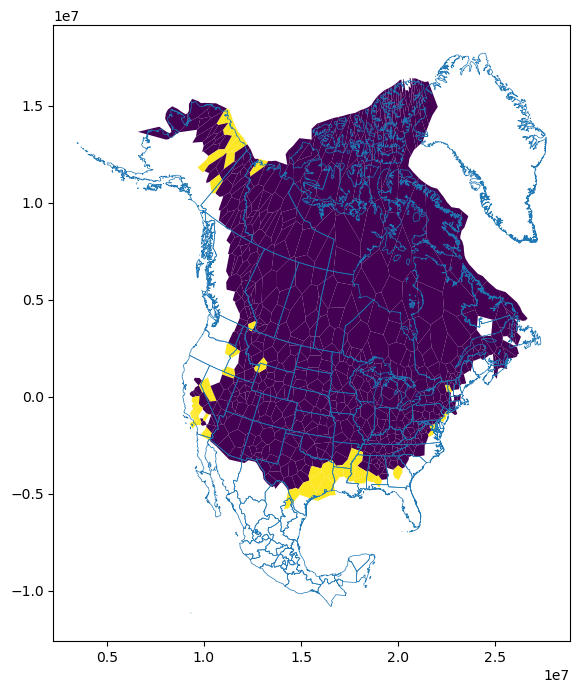

In [8]:
tmp = seds_by_column_and_age_range(units_seds, laurentia_columns, 40, 10, method='presence')
ax = tmp.plot(column='presence', figsize=(8,8))
boundaries.boundary.plot(ax=ax, linewidth=0.5)

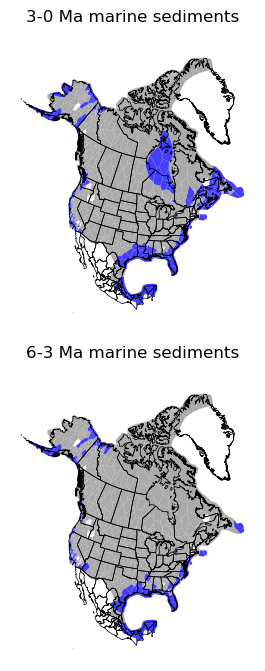

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(5, 8))

tmp = seds_by_column_and_age_range(units_seds, columns, 3, 0, method='presence')
tmp.plot(ax=ax[0], column='presence', cmap=ListedColormap(['#aaaaaa', '#443eff']), figsize=(8,8))
boundaries.boundary.plot(ax=ax[0], linewidth=0.5, color='k')
ax[0].axis('off')

ax[0].set_title('3-0 Ma marine sediments')

tmp = seds_by_column_and_age_range(units_seds, columns, 6, 3, method='presence')
tmp.plot(ax=ax[1], column='presence', cmap=ListedColormap(['#aaaaaa', '#443eff']), figsize=(8,8))
boundaries.boundary.plot(ax=ax[1], linewidth=0.5, color='k')
ax[1].axis('off')

ax[1].set_title('6-3 Ma marine sediments')

plt.savefig('figures/quaternary_marine_sediments.pdf', format='pdf', bbox_inches='tight')
plt.savefig('figures/quaternary_marine_sediments.png', format='png', dpi=300, bbox_inches='tight')

In [9]:
quat = seds_by_column_and_age_range(units_seds, columns, 8, 0, method='thickness')

,t_age,b_age,environ_y,max_thick
unit_id,,,,
2519,234.5000,238.2500,inferred marine marine,20.0
2515,253.9652,256.0278,inferred marine marine,70.0
2516,256.0278,260.8762,inferred marine marine,400.0
2497,260.8600,262.2100,inferred marine marine,40.0
2498,262.2100,263.5600,inferred marine marine,300.0
2499,263.5600,264.9100,inferred marine marine,150.0
2500,264.9100,268.5100,inferred marine marine,100.0
2502,268.5100,270.7600,inferred marine marine,500.0
2503,270.7600,275.2575,shoreface siliciclastic marine,500.0


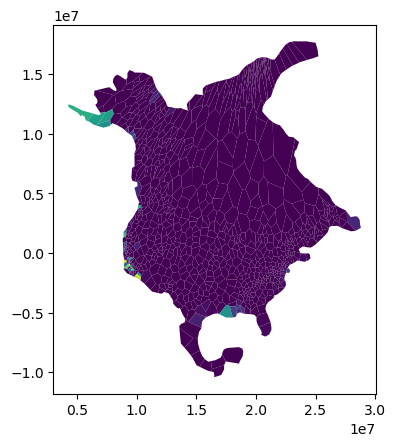

In [10]:
quat.plot(column='max_thick')
idx = quat['max_thick'] > 0
quat_marine_cols = quat[idx].index
idx = units_seds['col_id'] == 70

units_seds[idx][['t_age', 'b_age', 'environ_y', 'max_thick']]